In [24]:
from utils import *
from gurobipy import Env

env = Env()
env.setParam('LogToConsole', 0)
env.start()
filename = "test6"
n = 200
K = 5
seed = 5
l = 3
alpha = 1/2
beta = [1,1,1]
lower = 2
upper = n
M = 1e6
np.random.seed(seed)
labels = np.random.choice([0,1,2], p= [0.1,0.2,0.7], size=n)

X,Y,archetype = synthetic_data(n,K,seed)
centers, dist, q, clusters, clusters_assign, t = initialize_clusters(X,K,l,alpha,beta,n,labels,M,lower,upper)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-08


Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 3187.83it/s, Status=SUCCESS]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-08


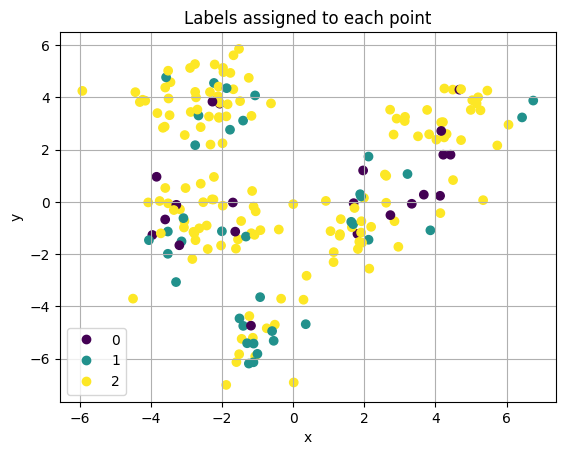

In [26]:
scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Labels assigned to each point')
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
plt.show()

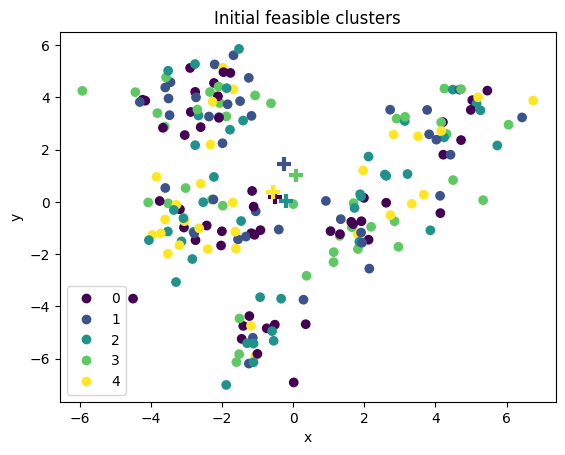

In [27]:
scatter = plt.scatter(X[:,0],X[:,1],c=clusters_assign,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial feasible clusters')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4])
plt.scatter([x[0] for x in centers],[x[1] for x in centers], marker="+", c=[0,1,2,3,4], s=100, linewidth=3)
plt.show()

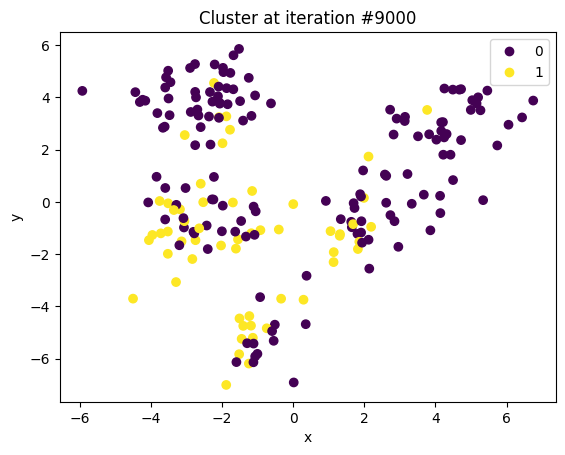

In [33]:
n = 9000
scatter = plt.scatter(X[:,0],X[:,1],c=s[n],label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster at iteration #'+str(n))
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
plt.show()

In [34]:
size_new_clusters = [sum(i) for i in s]

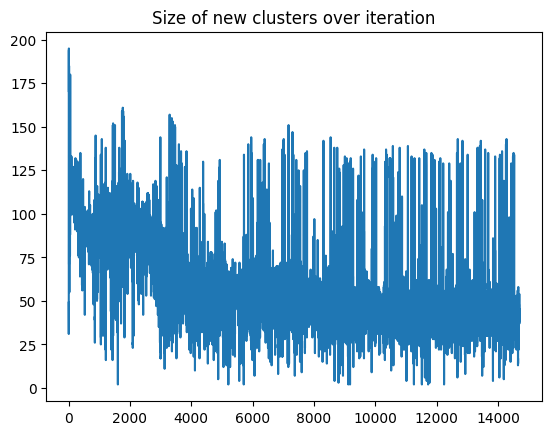

In [35]:
plt.plot(size_new_clusters)
plt.title("Size of new clusters over iteration")
plt.show()

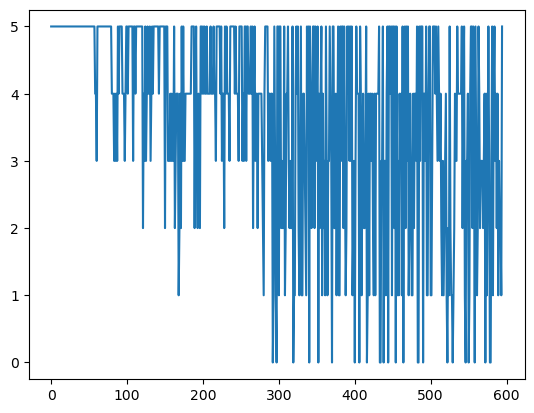

In [16]:
sizes_of_solutions = [sum(parsed_data[i]['master_solution']) for i in range(len(parsed_data))]
plt.plot(sizes_of_solutions)

In [17]:
sum(parsed_data[400]['master_solution'])

0

In [18]:
import re
import datetime

# Function to parse the log file
def parse_log_file(file_path):
    data = []

    with open(file_path, 'r') as file:
        for line in file:
            # Check if the line contains 'Best objective'
            if 'Master Solution' in line:
                data.append(list(map(int, re.search(r'\[(.*?)\]', line).group(1).split(', '))))

    return data

# Example usage:
log_file_path = './outputs/out6_200_display.txt'
parsed_data2 = parse_log_file(log_file_path)

In [19]:
sum(parsed_data2[60])

4

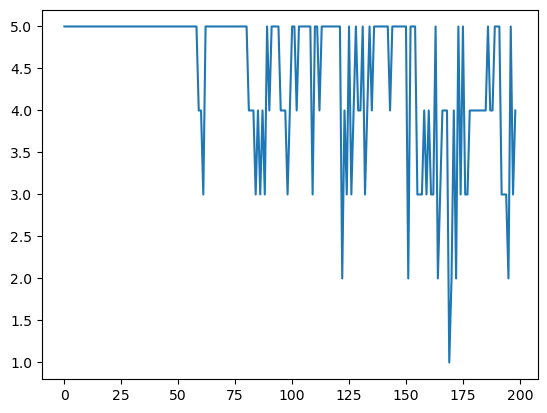

In [20]:
sizes = [sum(i) for i in parsed_data2]
plt.plot(sizes)

## Slack

In [1]:
import matplotlib.pyplot as plt

In [14]:
import ast

In [18]:
def parse_nested_list(line):
    try:
        line = line.strip()  # Remove leading/trailing whitespace
        if line.startswith("s: "):
            line = line[3:]  # Remove the prefix "r: "
        
        parsed_list = ast.literal_eval(line)
        if isinstance(parsed_list, list):
            return parsed_list
        else:
            raise ValueError("Input is not a valid nested list.")
    except ValueError as e:
        print("Error parsing nested list:", e)
        return None

In [20]:
import re
import datetime

# Function to parse the log file
def parse_log_file(file_path):
    data = []
    clusters = {}
    r = []
    s = []

    with open(file_path, 'r') as file:
        for line in file:
            if 'Pricing New cluster' in line:
                pattern = re.compile(r'(\d+) Solution (\d+) Pricing New cluster \[([01, ]+)\]')
                # Match the pattern in the log line
                match = pattern.match(line)

                if match:
                    iteration = int(match.group(1))
                    solution_number = int(match.group(2))
                    cluster_values = list(map(int, match.group(3).split(', ')))
                    if iteration not in clusters:
                        clusters[iteration] = []
                    clusters[iteration].append(cluster_values)
                else:
                    print("No match found in the log line.")
            if 'Iteration #' in line:
                iteration_data = {'iteration': int(re.search(r'\d+', line).group())}
                # Read the next few lines and save the result
                for _ in range(7):  # Assuming 8 lines follow 'Best objective' based on the provided example
                    line = next(file)
                    # elif 'Pricing New cluster' in line:
                    #     iteration_data['new_cluster'] = list(map(int, re.search(r'\[(.*?)\]', line).group(0).replace('[', '').replace(']', '').split(', ')))
                    if 'Time' in line:
                        time_str = re.search(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+', line).group()
                        iteration_data['time'] = datetime.datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f")
                    elif 'Slack variables' in line:
                        iteration_data['Slack variables'] = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 'Sum of Slack Variables' in line:
                        iteration_data['Sum of Slack Variables'] = float(re.search(r'-?\d+\.\d+', line).group())
                    elif 'Master Objective' in line:
                        iteration_data['master_objective'] = float(re.search(r'-?\d+\.\d+', line).group())
                    elif 'Master Solution' in line:
                        iteration_data['master_solution'] = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 'Master Dual' in line:
                        iteration_data['master_dual'] = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                
                data.append(iteration_data)
            if 'Result' in line:
                for _ in range(10):
                    line = next(file)
                    if 'r: ' in line:
                        r = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 's: ' in line:
                        s = parse_nested_list(line)


    return data,clusters,r,s

# Example usage:
log_file_path = './outputs/out7_slack4.txt'
parsed_data,clusters,r,s = parse_log_file(log_file_path)

In [21]:
len(s)

14708

In [4]:
len(parsed_data[120]['master_solution'])

1193

In [5]:
parsed_data[100]['master_objective']

3562.12791261648

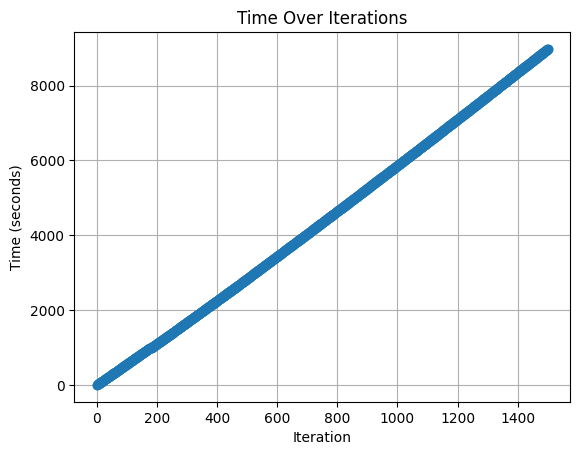

In [6]:
iterations = [iteration['iteration'] for iteration in parsed_data]
times = [iteration['time'] for iteration in parsed_data]


time_seconds = [(time - times[0]).total_seconds() for time in times]

plt.plot(iterations, time_seconds, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Time Over Iterations')
plt.grid(True)
plt.show()

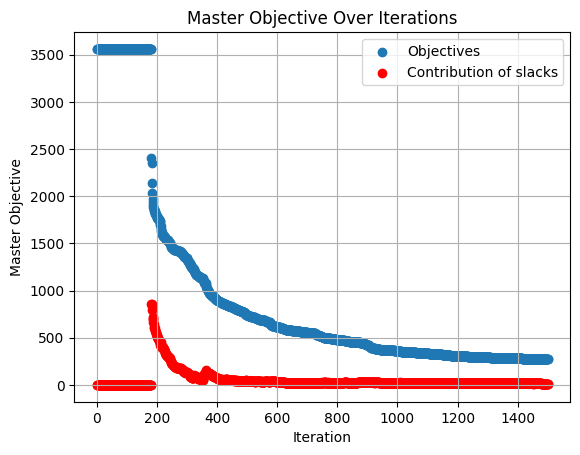

In [7]:
iterations = [iteration['iteration'] for iteration in parsed_data]
objectives = [iteration['master_objective'] for iteration in parsed_data]
slacks = [20 * iteration['Sum of Slack Variables'] for iteration in parsed_data]

plt.scatter(iterations, objectives,label='Objectives')
plt.scatter(iterations, slacks, c = 'r',label='Contribution of slacks')
plt.xlabel('Iteration')
plt.ylabel('Master Objective')
plt.title('Master Objective Over Iterations')
plt.grid(True)
plt.legend()
plt.show()

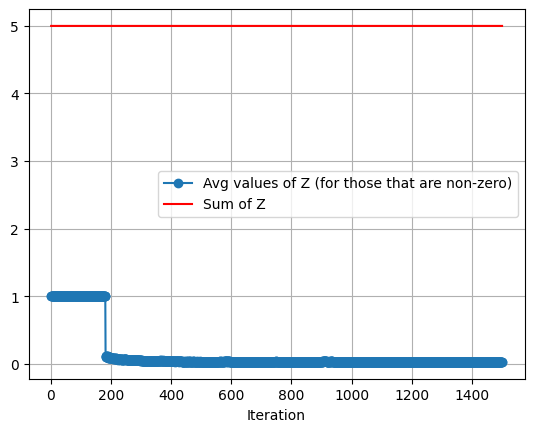

In [8]:
sizes_of_solutions = []
sum_sizes_of_solutions = []
num_nonzero_values = []
for i in range(len(parsed_data)):
  sol = parsed_data[i]['master_solution']
  counter = 0
  for j in sol:
    if j > 0:
      counter += 1
  num_nonzero_values.append(counter)
  sizes_of_solutions.append(sum(sol) / counter)
  sum_sizes_of_solutions.append(sum(sol))

plt.plot(iterations, sizes_of_solutions, marker='o',label='Avg values of Z (for those that are non-zero)')
plt.plot(iterations, sum_sizes_of_solutions, c = 'r',label='Sum of Z')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()
plt.show()

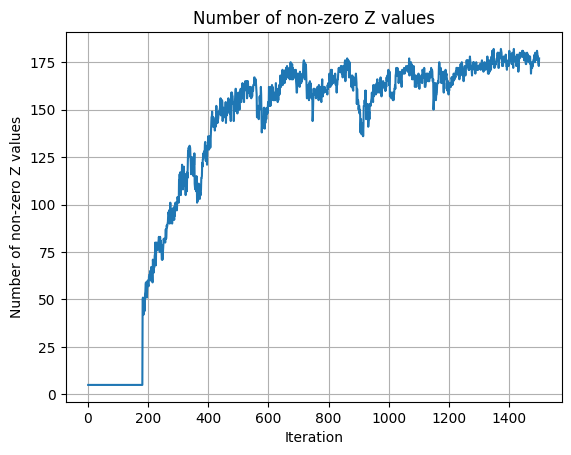

In [9]:
plt.plot(iterations, num_nonzero_values)
plt.xlabel('Iteration')
plt.ylabel('Number of non-zero Z values')
plt.title('Number of non-zero Z values')
plt.grid(True)
plt.show()

## Heatmap of all solutions

In [91]:
for i,j in enumerate(heatmap_data[-1]):
    if j > 0:
        print(j)

0.1599284722057792
0.0018528975251357227
0.2702393947446592
0.04027392700513969
0.11925381608408618
0.26428944808527693
0.38211805821472267
0.03083462458357325
0.11110133222642188
0.015578586301507606
0.06460859632052565
0.0074201849289553005
0.2293435957140217
0.034045673478499475
0.00120544480768911
0.017044003411697397
0.223681098894641
0.1491973109022469
0.10204737534671186
0.11533398893598393
0.025458002429165152
0.029390831779879098
0.018418679342984016
0.05017796530829316
0.03557983733677888
0.09629303564589416
0.08866446282941302
0.07360025302820745
0.14022213048547702
0.015836629608402212
0.07919798210061971
0.045980058984369694
0.12671733573357447
0.03670479948375893
0.05625091533843728
0.03968913198253912
0.002279004875085844
0.004444038845409823
0.004509891852889888
0.004217395175335437
0.031060061482318595
0.04020399710187887
0.024742020871120596
0.00987747930959407
0.04018692226516786
0.011832083561482295
0.002520078987622134
0.06313320974208665
0.031396228991787456
0.023

In [43]:
all_master_solutions = [iteration['master_solution'] for iteration in parsed_data]
all_master_solutions[:3]

[[1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 0.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

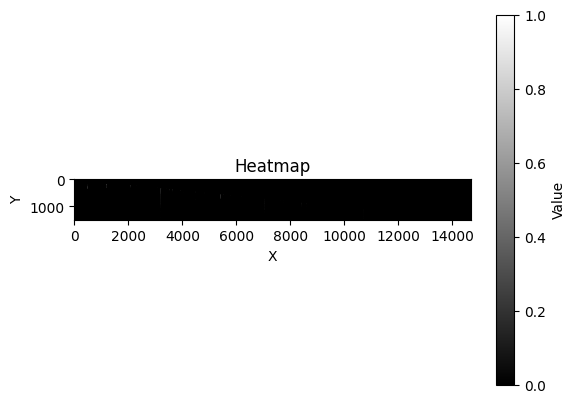

In [49]:
data = all_master_solutions

max_len = max(len(row) for row in data)

# Pad the rows with zeros to make them of equal length
padded_data = [row + [0.0] * (max_len - len(row)) for row in data]

# Convert data to a numpy array for plotting
heatmap_data = np.array(padded_data)

In [67]:
heatmap_data.shape

(1500, 14698)

In [84]:
heatmap_data = np.where(heatmap_data < 1e-3, 0, heatmap_data)

In [85]:
not_chosen = []
chosen = []
for i in range(heatmap_data.shape[1]):
    if sum(heatmap_data[:,i]) == 0:
        not_chosen.append(i)
    else:
        chosen.append(i)

In [87]:
print(len(not_chosen))

10010


In [52]:
import seaborn as sns

In [59]:
cmap = sns.cm.rocket_r

In [137]:
plt.figure(figsize=(16, 16),dpi = 5000) 
sns.heatmap(heatmap_data[:,chosen],cmap = cmap,vmax = 0.1)

<Axes: >

In [120]:
plt.plot(heatmap_data[:,3518])

In [111]:
indices_reduced = list(range(len(heatmap_data[-1,chosen])))
indices_reduced_sorted = sorted(indices_reduced,key= lambda i : -heatmap_data[-1,chosen][i])
print(indices_reduced_sorted)
print(np.array(heatmap_data[-1,chosen])[indices_reduced_sorted])

[1752, 800, 1569, 1986, 2507, 4016, 602, 2644, 4207, 3301, 3364, 1456, 2737, 1776, 2650, 3009, 3213, 3309, 4482, 3257, 1837, 4128, 3830, 3418, 2933, 3352, 4343, 4345, 4400, 4075, 4121, 1037, 3698, 3825, 3441, 3399, 2934, 2159, 4143, 3839, 3652, 1775, 4254, 4212, 2870, 4647, 4497, 3901, 3927, 4499, 2825, 4130, 3771, 3868, 4243, 4527, 4313, 4439, 4445, 2929, 2434, 4559, 4317, 4548, 4472, 3302, 4616, 1784, 4296, 4127, 4188, 4501, 4586, 4473, 4458, 4099, 3826, 4447, 3775, 4665, 4058, 3970, 4505, 4338, 4683, 1917, 4659, 4314, 4319, 4657, 4229, 3638, 3602, 4455, 4641, 4635, 3646, 4360, 4535, 4684, 4674, 4642, 4685, 4668, 4667, 4655, 4673, 4645, 4536, 4650, 4564, 3829, 4672, 4210, 3601, 4686, 4687, 4583, 4396, 799, 4570, 4681, 4652, 4644, 4676, 4571, 4206, 4666, 2232, 4587, 4662, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56

In [98]:
indices = list(range(len(all_master_solutions[-1])))

In [102]:
indices_sorted = sorted(indices,key= lambda i : -all_master_solutions[-1][i])

In [105]:
print(indices_sorted)

[5209, 3518, 4877, 5711, 6833, 10860, 3130, 7165, 11582, 8802, 8948, 4686, 7376, 5256, 7191, 8033, 8554, 8834, 12937, 8673, 5358, 11287, 10270, 9115, 7837, 8922, 12238, 12244, 12497, 11091, 11262, 3981, 9883, 10260, 9177, 9037, 7840, 6061, 11358, 10314, 9743, 5253, 11773, 11617, 7697, 14254, 13015, 10519, 10593, 13027, 7598, 11289, 10105, 10406, 11737, 13245, 12085, 12684, 12723, 7829, 6634, 13488, 12108, 13375, 12847, 8805, 14048, 5267, 11999, 11285, 11520, 13038, 13670, 12855, 12788, 11190, 10266, 12736, 10130, 14413, 11009, 10718, 13068, 12220, 14601, 5562, 14365, 12093, 12143, 14352, 11678, 9685, 9593, 12757, 14190, 14183, 9729, 12297, 13329, 14622, 14488, 14203, 14655, 14447, 14432, 14339, 14483, 14230, 13330, 14277, 13507, 10269, 14477, 11610, 9592, 14656, 14669, 13628, 12467, 3515, 13544, 14520, 14326, 14216, 14490, 13545, 11579, 14417, 6215, 13673, 14387, 14516, 14466, 14184, 10673, 13837, 14086, 14687, 14364, 14367, 14479, 14366, 14350, 14457, 6119, 14504, 3202, 13674, 14695, 

In [112]:
np.array(all_master_solutions[-1])[indices_sorted]

array([0.38211806, 0.27023939, 0.26428945, ..., 0.        , 0.        ,
       0.        ])

In [40]:
len(all_master_solutions[1000])

9859

In [113]:
r[5209]

31.367183045977058

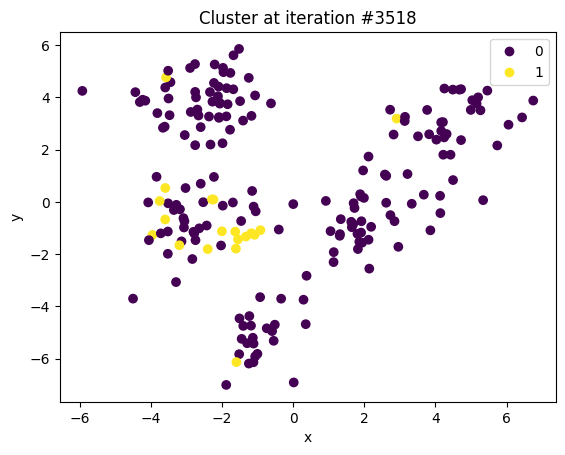

In [118]:
n = 3518
scatter = plt.scatter(X[:,0],X[:,1],c=s[n],label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster at iteration #'+str(n))
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
plt.show()

In [70]:
sizes_of_new_clusters = [sum(i) for i in s]

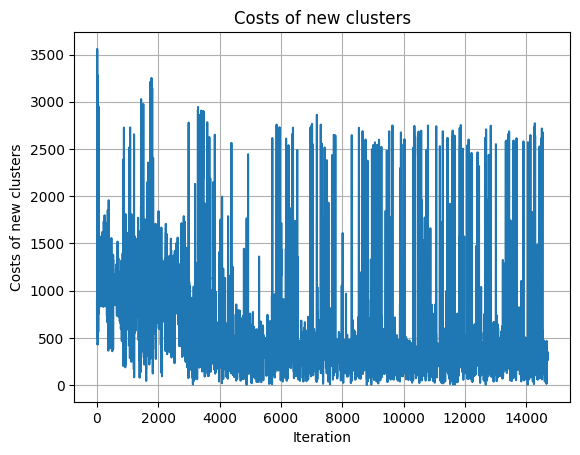

In [36]:
plt.plot(r)
plt.xlabel('Iteration')
plt.ylabel('Costs of new clusters')
plt.title('Costs of new clusters')
plt.grid(True)
plt.show()

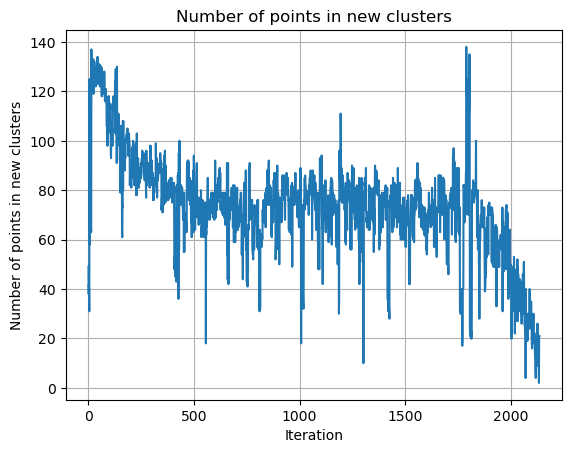

In [82]:
plt.plot(sizes_of_new_clusters)
plt.xlabel('Iteration')
plt.ylabel('Number of points in new clusters')
plt.title('Number of points in new clusters')
plt.grid(True)
plt.show()

In [12]:
objective_no_slacks = []
for d in (parsed_data[300:301]):
  sol = d['master_solution']
  total_obj = d['master_objective']
  slacks = 20 * sum(d['Slack variables'])
  res = 0
  print(len(sol))
  print(len(r))
  #print(np.array(r) @ np.array(sol))
  for i,j in enumerate(sol):
    #print("r[i],j",r[i],j,r[i]*j)
    if j != 0:
      res += r[i] * j
  print(res)
  print(total_obj, res + slacks)
  objective_no_slacks.append(res)
#plt.plot(objective_no_slacks)

2992
14708
1207.4422244495036
1336.6651039498554 1336.665103949855


In [13]:
print(parsed_data[100]['Slack variables'])
print(sum(parsed_data[100]['Slack variables']))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]